In [2]:
import numpy as np
import pandas as pd
import imageio
import h5py
import pickle

from tqdm import tqdm
from xqdm import xqdm
from pathlib import Path
import matplotlib.pyplot as plt
import re

In [3]:
dataset_dir = Path('data')
csv_files = sorted(list(dataset_dir.glob('motion_data_*.csv')))

In [4]:
using_columns = ['timestamp',
                 'acceleration_x', 'acceleration_y', 'acceleration_z',
                 'angular_vec_x', 'angular_vec_y', 'angular_vec_z',
                 'input_orientation_x', 'input_orientation_y', 'input_orientation_z', 'input_orientation_w',
                 'input_orientation_yaw', 'input_orientation_pitch', 'input_orientation_roll']

data/motion_data_user2_scene2.csv


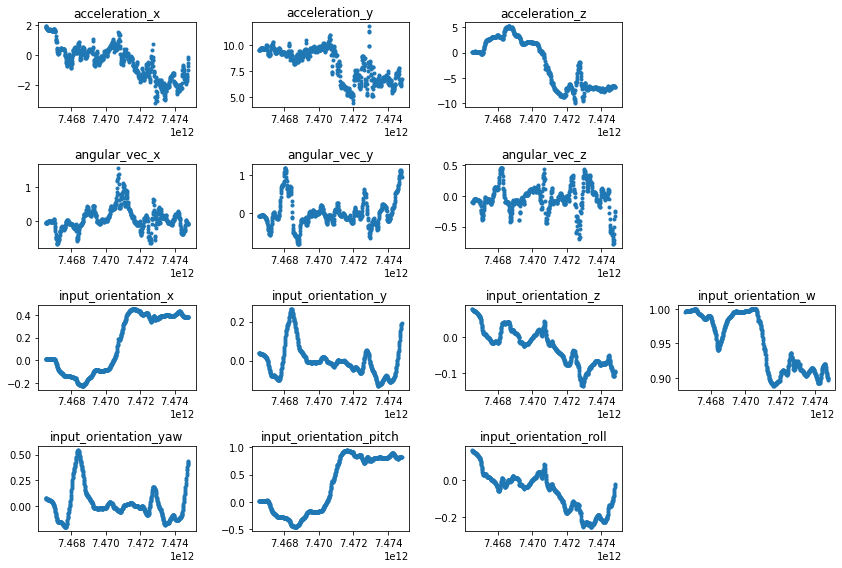

In [34]:
n = 4
print(csv_files[n])
csv = pd.read_csv(csv_files[n])
pl, pr = 0, 800

plt.figure(figsize=(12, 8))

for i in range(3):
    plt.subplot(4, 4, i+1)
    plt.scatter(csv['timestamp'][pl:pr], csv[using_columns[i+1]][pl:pr], marker='.')
    plt.title(using_columns[i+1])
for i in range(3):
    plt.subplot(4, 4, i+5)
    plt.scatter(csv['timestamp'][pl:pr], csv[using_columns[i+4]][pl:pr], marker='.')
    plt.title(using_columns[i+4])
for i in range(4):
    plt.subplot(4, 4, i+9)
    plt.scatter(csv['timestamp'][pl:pr], csv[using_columns[i+7]][pl:pr], marker='.')
    plt.title(using_columns[i+7])
for i in range(3):
    plt.subplot(4, 4, i+13)
    plt.scatter(csv['timestamp'][pl:pr], csv[using_columns[i+11]][pl:pr], marker='.')
    plt.title(using_columns[i+11])

plt.tight_layout()
plt.show()

In [41]:
def detect_collapse(csv):
    collapse_points = []
    
    timestamp = csv['timestamp']
    for i in range(len(csv) - 1):
        if timestamp[i+1] - timestamp[i] > 11760000 * 6:
            print(f'{i}\t{i+1}\t{(timestamp[i+1] - timestamp[i])/11760000}')

In [42]:
for csv_file in csv_files:
    print('\n=======================================')
    print(csv_file)
    detect_collapse(pd.read_csv(csv_file))


data/motion_data_user1_scene1.csv
0	1	11.22003231292517
999	1000	862.5161556122449

data/motion_data_user1_scene2.csv
507	508	1069.3978723639457

data/motion_data_user1_scene3.csv
661	662	1236.111869132653

data/motion_data_user2_scene1.csv
624	625	310.18496981292515

data/motion_data_user2_scene2.csv
736	737	1350.780949829932

data/motion_data_user2_scene3.csv
675	676	7094.566483418367
833	834	6.592204591836735

data/motion_data_user3_scene1.csv
645	646	3292.8012137755104

data/motion_data_user3_scene2.csv
612	613	3283.7256552721087

data/motion_data_user3_scene3.csv
954	955	6812.138240561225

data/motion_data_user4_scene1.csv
755	756	7066.984222619048

data/motion_data_user4_scene2.csv
544	545	3821.9250710884353

data/motion_data_user4_scene3.csv
866	867	14827.481112414966

data/motion_data_user5_scene1.csv
0	1	11.37905544217687
999	1000	15144.563682312924

data/motion_data_user5_scene2.csv
682	683	1982.2320032312925

data/motion_data_user5_scene3.csv
760	761	9002.312460459183
1147	

In [ ]:
'data/motion_data_user1_scene1.csv': [(1050, -1)],
'data/motion_data_user1_scene2.csv': [(550, -1)],
'data/motion_data_user1_scene3.csv': [(700, -1)],
'data/motion_data_user2_scene1.csv': [(700, -1)],
'data/motion_data_user2_scene2.csv': [(750, -1)],
'data/motion_data_user2_scene3.csv': [(850, -1)],
'data/motion_data_user3_scene1.csv': [(700, -1)],
'data/motion_data_user3_scene2.csv': [(650, -1)],
'data/motion_data_user3_scene3.csv': [(1000, -1)],
'data/motion_data_user4_scene1.csv': [(800, -1)],
'data/motion_data_user4_scene2.csv': [(600, -1)],
'data/motion_data_user4_scene3.csv': [(900, -1)],
'data/motion_data_user5_scene1.csv': [(1050, -1)],
'data/motion_data_user5_scene2.csv': [(700, -1)],
'data/motion_data_user5_scene3.csv': [(1150, -1)],
'data/motion_data_user6_scene1.csv': [(600, -1)],
'data/motion_data_user6_scene2.csv': [(1000, -1)],
'data/motion_data_user6_scene3.csv': [(600, -1)],
'data/motion_data_user7_scene1.csv': [(950, 7900), (7950, -1)],
'data/motion_data_user7_scene2.csv': [(650, -1)],
'data/motion_data_user7_scene3.csv': [(800, -1)],

In [45]:
csv.iloc[:10]

,timestamp,biosignal_0,biosignal_1,biosignal_2,biosignal_3,biosignal_4,biosignal_5,biosignal_6,biosignal_7,acceleration_x,...,predicted_orientation_y,predicted_orientation_z,predicted_orientation_w,predicted_orientation_yaw,predicted_orientation_pitch,predicted_orientation_roll,predicted_projection_left,predicted_projection_top,predicted_projection_right,predicted_projection_bottom
0,7466531537724,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.915420,...,0.039002,0.080352,0.995906,0.076521,0.021762,0.161837,-1.0,1.0,1.0,-1.0
1,7466543560361,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.905843,...,0.038541,0.079218,0.996017,0.075626,0.021574,0.159541,-1.0,1.0,1.0,-1.0
2,7466555413029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.889083,...,0.037802,0.078287,0.996124,0.074197,0.021070,0.157633,-1.0,1.0,1.0,-1.0
3,7466567330315,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.879506,...,0.037099,0.077411,0.996225,0.072864,0.020243,0.155826,-1.0,1.0,1.0,-1.0
4,7466579840332,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.831620,...,0.036411,0.076917,0.996297,0.071588,0.018992,0.154773,-1.0,1.0,1.0,-1.0
5,7466591196475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.826832,...,0.035902,0.076335,0.996365,0.070620,0.018399,0.153570,-1.0,1.0,1.0,-1.0
6,7466603599729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.783735,...,0.035168,0.075892,0.996424,0.069133,0.018631,0.152672,-1.0,1.0,1.0,-1.0
7,7466617023009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.745426,...,0.034559,0.075590,0.996471,0.067934,0.018392,0.152043,-1.0,1.0,1.0,-1.0
8,7466626070918,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.723878,...,0.034084,0.074853,0.996550,0.067083,0.017163,0.150511,-1.0,1.0,1.0,-1.0
9,7466638844123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.707118,...,0.034027,0.074983,0.996542,0.066965,0.017206,0.150773,-1.0,1.0,1.0,-1.0
